In [359]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [360]:
df_sample = pd.read_csv('sample_submission.csv', sep=',', encoding='utf8')
df_train = pd.read_csv('train.csv', sep=',', encoding='utf8')
df_test = pd.read_csv('test.csv', sep=',', encoding='utf8')

In [361]:
pd.set_option('max_info_columns', 500)
pd.set_option('display.max_columns', 500)

In [362]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'
df = df_test.append(df_train).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 23 columns):
_id               41188 non-null object
age               41188 non-null int64
campaign          41188 non-null int64
cons.conf.idx     41188 non-null float64
cons.price.idx    41188 non-null float64
contact           41188 non-null object
day_of_week       41188 non-null object
default           41188 non-null object
duration          41188 non-null int64
education         41188 non-null object
emp.var.rate      41188 non-null float64
euribor3m         41188 non-null float64
housing           41188 non-null object
job               41188 non-null object
loan              41188 non-null object
marital           41188 non-null object
month             41188 non-null object
nr.employed       41188 non-null float64
pdays             41188 non-null int64
poutcome          41188 non-null object
previous          41188 non-null int64
sample            41188 non-null object
target     

In [363]:
for i in df.columns:
    if i == '_id':
        pass
    elif str(df[i].dtype) == 'object':
        print('='*10)
        print(i)
        print(set(df[i]))
        print('\n')

contact
{'cellular', 'telephone'}


day_of_week
{'thu', 'mon', 'fri', 'tue', 'wed'}


default
{'no', 'unknown', 'yes'}


education
{'basic.6y', 'high.school', 'illiterate', 'professional.course', 'basic.4y', 'basic.9y', 'university.degree', 'unknown'}


housing
{'no', 'unknown', 'yes'}


job
{'housemaid', 'admin.', 'blue-collar', 'technician', 'student', 'self-employed', 'entrepreneur', 'management', 'retired', 'unknown', 'unemployed', 'services'}


loan
{'yes', 'unknown', 'no'}


marital
{'married', 'single', 'unknown', 'divorced'}


month
{'dec', 'jun', 'sep', 'jul', 'apr', 'may', 'nov', 'mar', 'aug', 'oct'}


poutcome
{'failure', 'nonexistent', 'success'}


sample
{'test', 'train'}




In [365]:
df[-df['target'].isnull()].head(100)

,_id,age,campaign,cons.conf.idx,cons.price.idx,contact,day_of_week,default,duration,education,emp.var.rate,euribor3m,housing,job,loan,marital,month,nr.employed,pdays,poutcome,previous,sample,target
16476,df7489733b004bbe40d3d37b34f82419,54,1,-36.1,93.444,cellular,tue,unknown,87,professional.course,1.4,4.963,no,technician,no,married,aug,5228.1,999,nonexistent,0,train,0.0
16477,905a0b9a5456ee962223033473666be3,36,1,-36.4,93.994,telephone,mon,no,291,basic.4y,1.1,4.857,no,services,no,single,may,5191.0,999,nonexistent,0,train,0.0
16478,02d69c07ec6d68e31d641edd45ce61cd,53,1,-36.1,93.444,cellular,mon,no,182,basic.4y,1.4,4.965,yes,blue-collar,no,married,aug,5228.1,999,nonexistent,0,train,0.0
16479,e492fbe0cccaf67cdb5c0944dbc8a167,34,2,-36.4,93.994,telephone,wed,no,180,basic.9y,1.1,4.857,yes,blue-collar,yes,married,may,5191.0,999,nonexistent,0,train,0.0
16480,ac2dc6f5835bdea8e71dd99b65208d07,29,1,-38.3,94.027,telephone,fri,no,6,university.degree,-1.7,0.890,yes,services,no,single,aug,4991.6,999,nonexistent,0,train,0.0
16481,3c41d96da147ab5a745938cbd85e2313,56,2,-41.8,94.465,telephone,thu,unknown,64,basic.9y,1.4,4.961,no,self-employed,no,single,jun,5228.1,999,nonexistent,0,train,0.0
16482,1a87845e9d5740a2619acd478da08459,33,2,-40.0,93.876,cellular,mon,no,312,university.degree,-1.8,0.685,yes,admin.,yes,married,may,5008.7,999,nonexistent,0,train,0.0
16483,e07d393a5d9b174b39f6064823386759,36,1,-42.0,93.200,cellular,wed,no,20,university.degree,-0.1,4.120,yes,management,no,married,nov,5195.8,999,failure,1,train,0.0
16484,e5a3da407a75e8475a3e1bb6a804b1c7,70,1,-49.5,94.601,cellular,thu,no,585,professional.course,-1.1,0.987,no,retired,no,married,oct,4963.6,6,success,3,train,1.0
16485,42b112272cd4851b4d65d1ed464fbbd9,32,2,-46.2,92.893,cellular,thu,unknown,196,professional.course,-1.8,1.327,yes,blue-collar,no,married,may,5099.1,999,failure,1,train,0.0


In [435]:
def education_encode (s):
    if s == 'unknown':
        return 999
    elif s == 'illiterate':
        return 0
    elif s == 'basic.4y':
        return 1
    elif s == 'basic.6y':
        return 2
    elif s == 'basic.9y':
        return 3
    elif s == 'high.school':
        return 4
    elif s == 'professional.course':
        return 5
    elif s == 'university.degree':
        return 6

def month_encode (s):
    if s == 'mar':
        return 3
    elif s == 'apr':
        return 4
    elif s == 'may':
        return 5
    elif s == 'jun':
        return 6
    elif s == 'jul':
        return 7
    elif s == 'aug':
        return 8
    elif s == 'sep':
        return 9
    elif s == 'oct':
        return 10
    elif s == 'nov':
        return 11
    elif s == 'dec':
        return 12
    
def day_of_week_encode (s):
    if s == 'mon':
        return 1
    elif s == 'tue':
        return 2
    elif s == 'wed':
        return 3
    elif s == 'thu':
        return 4
    elif s == 'fri':
        return 5

def yesno_encode (s):
    if s == 'yes' or s == 'success':
        return 1
    elif s == 'no' or s == 'failure':
        return 0
    elif s == 'unknown' or s == 'nonexistent':
        return 999 
    
def preproc_data(df_input):
    df_output = df_input.copy()
    
    df_output = df_output.drop(['_id'], axis=1)

#----------------------- v2 -----------------------     
#     df_output['education']=df_output['education'].map(lambda s: education_encode(s))
#     df_output['month']=df_output['month'].map(lambda s: month_encode(s))
#     df_output['day_of_week']=df_output['day_of_week'].map(lambda s: day_of_week_encode(s))

#     df_output=pd.get_dummies(data=df_output, columns=['contact','default','housing','job','loan','marital','poutcome'])
#----------------------- v1 -----------------------    
#     df_output['education']=df_output['education'].map(lambda s: education_encode(s))
#     df_output['month']=df_output['month'].map(lambda s: month_encode(s))
#     df_output['day_of_week']=df_output['day_of_week'].map(lambda s: day_of_week_encode(s))

#     df_output['default']=df_output['default'].map(lambda s: yesno_encode(s))
#     df_output['housing']=df_output['housing'].map(lambda s: yesno_encode(s))
#     df_output['loan']=df_output['loan'].map(lambda s: yesno_encode(s))
#     df_output['poutcome']=df_output['poutcome'].map(lambda s: yesno_encode(s))

#     df_output=pd.get_dummies(data=df_output, columns=['contact','job','marital']) 
#----------------------------------------------------        
    df_output=pd.get_dummies(data=df_output, columns=['contact','default','housing','job','loan','marital','poutcome',
                                                      'education','month','day_of_week'])
    
    return df_output

In [395]:
df_preproc=df.pipe(preproc_data)

In [423]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc[df_preproc['sample'] == 'train'].drop(['sample'], axis=1)
df_test_preproc = df_preproc[df_preproc['sample'] == 'test'].drop(['sample'], axis=1)

In [424]:
X=df_train_preproc.drop(['target'], axis=1).copy()
X_sub=df_test_preproc.drop(['target'], axis=1).copy()
y=df_train_preproc['target'].copy()

In [425]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [426]:
import random
import math
import pylab as pl
from matplotlib.colors import ListedColormap

In [436]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
predict1 = dtc.predict(X_test)

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
predict2 = rfc.predict_proba(X_test)

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
predict3 = lr.predict_proba(X_test)

# from sklearn.metrics import confusion_matrix
# confusion_matrix = confusion_matrix(y_test, predict1)
# print(confusion_matrix)

In [428]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
predict4 = knn.predict_proba(X_test)

(-0.01, 1.01)

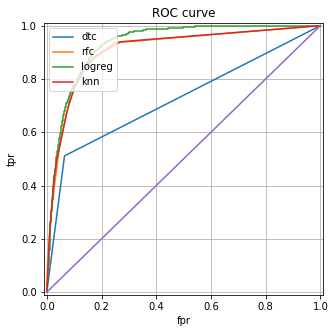

In [402]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

fpr1, tpr1, thresholds1 = roc_curve(y_test, predict1)
fpr2, tpr2, thresholds2 = roc_curve(y_test, predict2[:,1])
fpr3, tpr3, thresholds3 = roc_curve(y_test, predict3[:,1])
fpr4, tpr4, thresholds4 = roc_curve(y_test, predict4[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr1, tpr1, label='dtc')
plt.plot(fpr2, tpr2, label='rfc')
plt.plot(fpr3, tpr3, label='logreg')
plt.plot(fpr4, tpr4, label='knn')
plt.legend(loc='upper left')
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [403]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

dtc_cv=cross_val_score(
    dtc,
    df_preproc[df_preproc['sample']=='train'].drop(['sample','target'], axis=1),
    df_preproc[df_preproc['sample']=='train']['target'],
    scoring='roc_auc',
    cv=10
)
rfc_cv=cross_val_score(
    rfc,
    df_preproc[df_preproc['sample']=='train'].drop(['sample','target'], axis=1),
    df_preproc[df_preproc['sample']=='train']['target'],
    scoring='roc_auc',
    cv=10
)

lr_cv=cross_val_score(
    lr,
    df_preproc[df_preproc['sample']=='train'].drop(['sample','target'], axis=1),
    df_preproc[df_preproc['sample']=='train']['target'],
    scoring='roc_auc',
    cv=10
)

knn_cv=cross_val_score(
    knn,
    df_preproc[df_preproc['sample']=='train'].drop(['sample','target'], axis=1),
    df_preproc[df_preproc['sample']=='train']['target'],
    scoring='roc_auc',
    cv=10
)



In [404]:
print('dtc ' + str(dtc_cv.mean()))
print('rfc ' + str(rfc_cv.mean()))
print('lr ' + str(lr_cv.mean()))
print('knn ' + str(knn_cv.mean()))

dtc 0.7337549532779759
rfc 0.9075300791401133
lr 0.9294293907613737
knn 0.9136819267763258


In [ ]:
X=df_train_preproc.drop(['target'], axis=1).copy()
X_sub=df_test_preproc.drop(['target'], axis=1).copy()
y=df_train_preproc['target'].copy()

X.loc[:,'knn_pp']=knn.predict_proba(X)[:,1]
X.loc[:,'lr_pp']=lr.predict_proba(X.drop(['knn_pp'], axis=1))[:,1]
X_sub.loc[:,'knn_pp']=knn.predict_proba(X_sub)[:,1]
X_sub.loc[:,'lr_pp']=lr.predict_proba(X_sub.drop(['knn_pp'], axis=1))[:,1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
predict2 = rfc.predict_proba(X_test)

rfc_cv=cross_val_score(
    rfc,
    X,
    y,
    scoring='roc_auc',
    cv=10
)
print('rfc ' + str(rfc_cv.mean()))

In [429]:
X=df_train_preproc.drop(['target'], axis=1).copy()
X_sub=df_test_preproc.drop(['target'], axis=1).copy()
y=df_train_preproc['target'].copy()

X.loc[:,'knn_pp']=knn.predict_proba(X)[:,1]
X.loc[:,'rfc_pp']=rfc.predict_proba(X.drop(['knn_pp'], axis=1))[:,1]
X_sub.loc[:,'knn_pp']=knn.predict_proba(X_sub)[:,1]
X_sub.loc[:,'rfc_pp']=rfc.predict_proba(X_sub.drop(['knn_pp'], axis=1))[:,1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
predict3 = lr.predict_proba(X_test)

lr_cv=cross_val_score(
    lr,
    X,
    y,
    scoring='roc_auc',
    cv=10
)
print('lr ' + str(lr_cv.mean()))

lr 0.9820939427566591


In [437]:
predict_sub = lr.predict_proba(X_sub)

In [450]:
df_sub=df[df.loc[:,'sample'] == 'test'].copy()
df_sub.loc[:,'target']=predict_sub[:,1]

In [451]:
df[['_id','target']].to_csv('tg_p_v3.csv',index=False)